# Decision Tree - Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

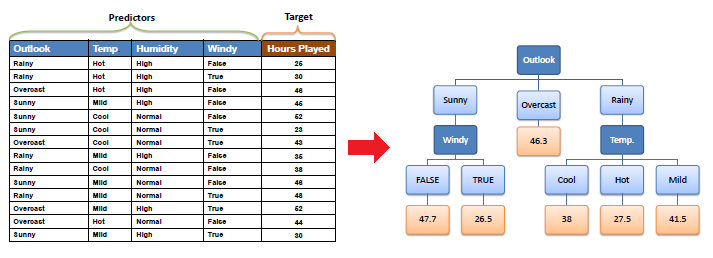

# Decision Tree Algorithm

# Standard Deviation

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). We use standard deviation to calculate the homogeneity of a numerical sample. If the numerical sample is completely homogeneous its standard deviation is zero.

a) Standard deviation for one attribute:

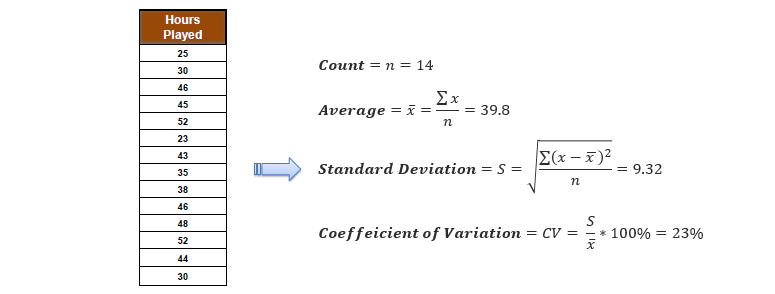

Standard Deviation (S) is for tree building (branching).

Coefficient of Deviation (CV) is used to decide when to stop branching. We can use Count (n) as well.

Average (Avg) is the value in the leaf nodes.

b) Standard deviation for two attributes (target and predictor):

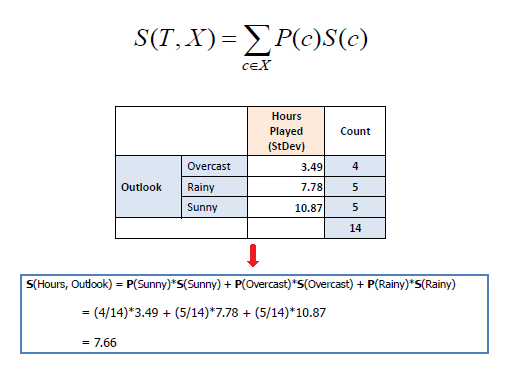

# Standard Deviation Reduction

The standard deviation reduction is based on the decrease in standard deviation after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest standard deviation reduction (i.e., the most homogeneous branches).


Step 1: The standard deviation of the target is calculated.

Standard deviation (Hours Played) = 9.32

Step 2: The dataset is then split on the different attributes. The standard deviation for each branch is calculated. The resulting standard deviation is subtracted from the standard deviation before the split. The result is the standard deviation reduction. 

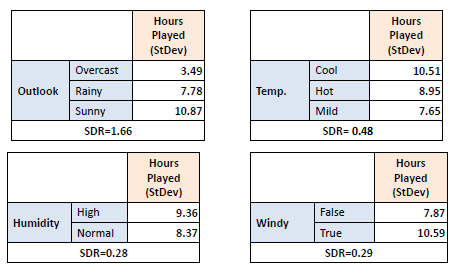

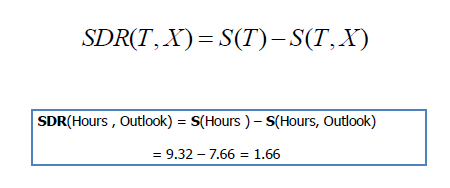

Step 3: The attribute with the largest standard deviation reduction is chosen for the decision node. 

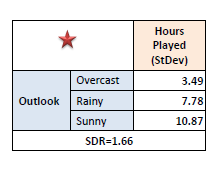

Step 4a: The dataset is divided based on the values of the selected attribute. This process is run recursively on the non-leaf branches, until all data is processed.

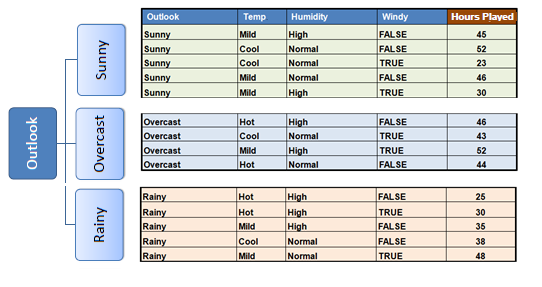

In practice, we need some termination criteria. For example, when coefficient of deviation (CV) for a branch becomes smaller than a certain threshold (e.g., 10%) and/or when too few instances (n) remain in the branch (e.g., 3). 		


		
Step 4b: "Overcast" subset does not need any further splitting because its CV (8%) is less than the threshold (10%). The related leaf node gets the average of the "Overcast" subset.


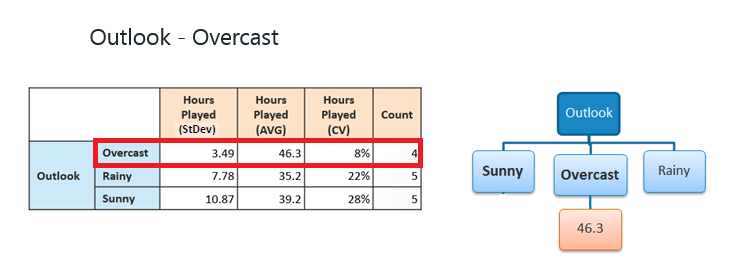

Step 4c: However, the "Sunny" branch has an CV (28%) more than the threshold (10%) which needs further splitting. We select "Temp" as the best best node after "Outlook" because it has the largest SDR. 

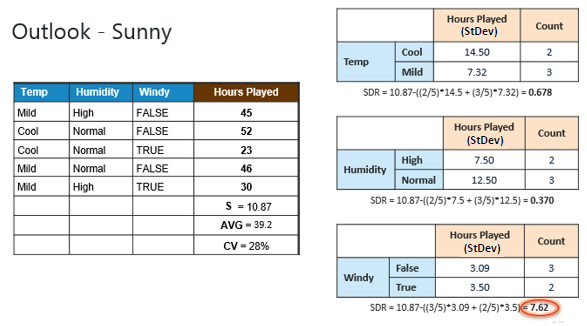

Because the number of data points for both branches (FALSE and TRUE) is equal or less than 3 we stop further branching and assign the average of each branch to the related leaf node.

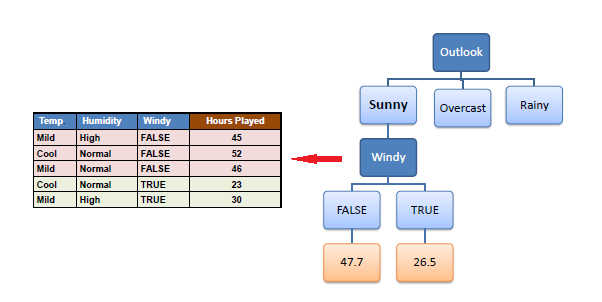

Step 4d: Moreover, the "rainy" branch has an CV (22%) which is more than the threshold (10%). This branch needs further splitting. We select "Temp" as the best best node because it has the largest SDR. 

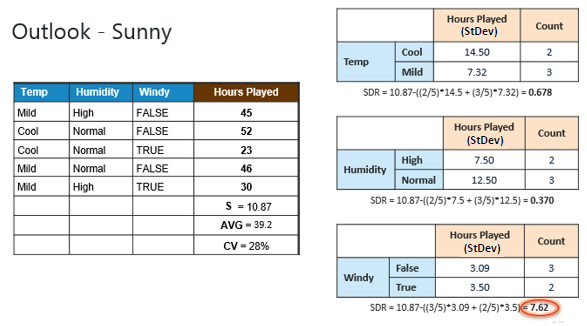

Because the number of data points for all three branches (Cool, Hot and Mild) is equal or less than 3 we stop further branching and assign the average of each branch to the related leaf node

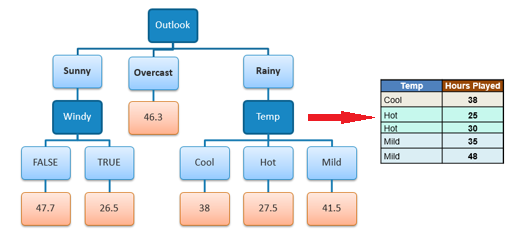

When the number of instances is more than one at a leaf node we calculate the average as the final value for the target.

# Business Problem - Predict the price of Banglore House

Using Decision Tree Regression - Supervised Machine Learning Algorithm


# Load Libraries

In [1]:
import pandas as pd

# Load Data

In [2]:
df = pd.read_csv("bangalore house price prediction OHE-data.csv")
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# Split Data

In [3]:
X = df.drop('price',axis=1)
y = df['price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of X_test =  (1424, 107)
Shape of y_train =  (5696,)
Shape of y_test =  (1424,)


# Decision Tree Regression - ML Model Training

In [6]:
from  sklearn.tree import DecisionTreeRegressor

# Criterion MSE

In [8]:
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train,y_train)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [9]:
regressor.score(X_test,y_test)

0.874032733258248

# Predict the value of Home

In [10]:
X_test.iloc[-1,:]

bath                               2.000000
balcony                            0.000000
total_sqft_int                  1566.000000
bhk                                2.000000
price_per_sqft                 11494.252874
                                   ...     
location_Hosur Road                0.000000
location_Horamavu Banaswadi        0.000000
location_Domlur                    0.000000
location_Mahadevpura               0.000000
location_Tumkur Road               0.000000
Name: 43, Length: 107, dtype: float64

In [11]:
regressor.predict([X_test.iloc[-1,:]])

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([171.])

In [12]:
y_test.iloc[-1]

180.0

In [13]:
pred = regressor.predict(X_test)
pred

array([ 84.  ,  39.95, 120.  , ...,  33.  ,  62.5 , 171.  ])

In [14]:
y_test

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64